In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import arviz as az
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

/Users/corrado/opt/anaconda3/envs/pymc9_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
y = 14
ntrials = 100

alpha_prior = 4
beta_prior = 6

with pm.Model() as bb_model:
    theta = pm.Beta("theta", alpha=alpha_prior, beta=beta_prior)
    obs = pm.Binomial("obs", p=theta, n=ntrials, observed=y)

In [4]:
with bb_model:
    idata = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


I0000 00:00:1699425539.099834       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
Compilation time = 0:00:00.585310


Sampling...


  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                                | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                               | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1711.47it/s]


Running chain 1: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1713.49it/s]


Running chain 2: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1715.14it/s]


Running chain 3: 100%|██████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1716.83it/s]


Sampling time = 0:00:01.377477


Transforming variables...


Transformation time = 0:00:00.057027


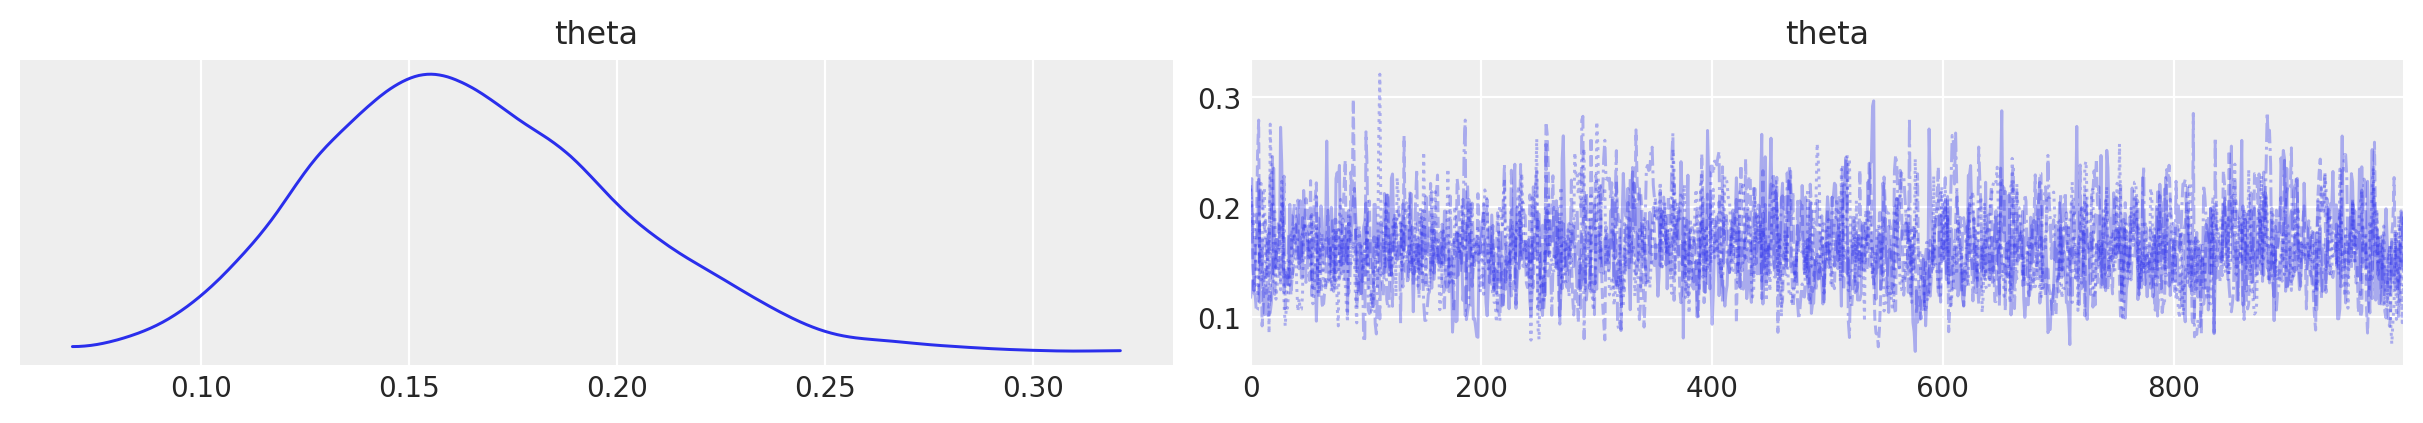

In [5]:
az.plot_trace(idata, combined=True)
plt.show()

In [6]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [7]:
idata.posterior["theta"]

<xarray.DataArray 'theta' (chain: 4, draw: 1000)>
array([[0.21385617, 0.22615798, 0.14862754, ..., 0.17038347, 0.14679274,
        0.19004213],
       [0.21703396, 0.20564537, 0.17537458, ..., 0.16197334, 0.09500567,
        0.12685824],
       [0.22013653, 0.19753534, 0.14797267, ..., 0.1967962 , 0.18490662,
        0.18529975],
       [0.11704867, 0.12608851, 0.13529881, ..., 0.18631433, 0.19699713,
        0.12791393]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [8]:
idata.posterior["theta"].shape

(4, 1000)

In [9]:
idata.posterior["theta"][0, 1:10]

<xarray.DataArray 'theta' (draw: 9)>
array([0.22615798, 0.14862754, 0.1238431 , 0.17052935, 0.16664219,
       0.17224503, 0.22542695, 0.15080037, 0.16775197])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 1 2 3 4 5 6 7 8 9

In [10]:
post = az.extract(idata)
post

<xarray.Dataset>
Dimensions:  (sample: 4000)
Coordinates:
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
Data variables:
    theta    (sample) float64 0.2139 0.2262 0.1486 ... 0.1863 0.197 0.1279
Attributes:
    created_at:     2023-11-08T06:39:00.565254
    arviz_version:  0.16.1

In [11]:
post["theta"]

<xarray.DataArray 'theta' (sample: 4000)>
array([0.21385617, 0.22615798, 0.14862754, ..., 0.18631433, 0.19699713,
       0.12791393])
Coordinates:
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999

In [12]:
post["theta"].shape

(4000,)

In [13]:
post.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 0.1641

In [14]:
post["theta"].mean()

<xarray.DataArray 'theta' ()>
array(0.16408661)

In [15]:
post.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    theta    float64 0.1615

In [16]:
np.std(post["theta"])

<xarray.DataArray 'theta' ()>
array(0.03618728)

In [17]:
az.summary(idata, hdi_prob=0.94, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.164,0.036,0.098,0.231,0.001,0.001,1586.283,1916.643,1.001


In [18]:
ll = stats.beta.ppf(0.03, 18, 92)
ul = stats.beta.ppf(0.97, 18, 92)
list([ll, ul])

[0.10303527075398666, 0.23457657606771784]

In [19]:
print(np.mean(post["theta"] < 0.2))

<xarray.DataArray 'theta' ()>
array(0.83925)


In [20]:
post_odds = (np.mean(post["theta"] < 0.2)) / (1 - np.mean(post["theta"] < 0.2))
print(post_odds)

<xarray.DataArray 'theta' ()>
array(5.22083981)


In [21]:
threshold = 0.2
prior_prob = stats.beta.cdf(threshold, a=alpha_prior, b=beta_prior)

In [22]:
prior_odds = prior_prob / (1 - prior_prob)
print(prior_odds)

0.09366320688790145


In [23]:
BF = post_odds / prior_odds
print(BF)

<xarray.DataArray 'theta' ()>
array(55.74056224)


In [24]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Nov 08 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

numpy     : 1.25.2
arviz     : 0.16.1
pandas    : 2.1.1
pymc      : 5.9.1
matplotlib: 3.8.0
scipy     : 1.11.3
seaborn   : 0.13.0

Watermark: 2.4.3

